<a href="https://www.nvidia.com/dli"> <img src="images/DLI Header.png" alt="Header" style="width: 400px;"/> </a>

# Trading Strategy for Finance using LSTMs

This lab was developed by Mike Imas, Onur Yilmaz Ph.D., and Andy Steinbach Ph.D.

## 1. Environment Verification

Before we begin, let's verify WebSockets are working on your system. To do this, execute the cell block below by giving it focus (clicking on it with your mouse), and hitting Shift-Enter, or pressing the play button in the toolbar above. If all goes well, you should see some output returned below the grey cell.

In [1]:
print("The answer should be three: " + str(1+2))

The answer should be three: 3


Let's execute the cell below to display information about the GPUs running on the server.

In [2]:
!nvidia-smi

Sun Apr 14 20:24:18 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 396.26                 Driver Version: 396.26                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:1E.0 Off |                    0 |
| N/A   45C    P0    73W / 149W |     73MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## 2. Lab Overview

This lab focuses on the prediction of time series  financial data using a special recurrent neural network (RNN), called Long Short Term Memory (LSTM), for trading strategies in finance. 

The goal of this lab is to give you a deep learning (DL) approach that can be potentially beneficial to the complex trading strategies in finance. This lab is not a complete trading strategy that generates a profit and loss curve (PNL). Rather, it shows how LSTM based deep neural networks can be applied to predict time series financial data. The code provided in this lab can be repurposed to predict the any time series financial data to be used to make certain decisions, opening a long position or closing a short position.

DL has been disrupting many applications including computer vision, natural language processing, and there has been a flurry of research and development activities in different verticals of the industry such as healthcare and finance to exploit this new technology for the area specific use cases. DL based investment strategies are also in the center of research and development activities in the algorithmic trading. 

In this lab, it is assumed that you are familiar with RNNs, TensorFlow, and Python. For more information on RNNs, LSTMs, and TensorFlow, please check the relevant labs in DLI. 

## 3. Implementation of LSTM based Financial Data Predictor

In this section, we will go over the implementation of Long Short Term Memory (LSTM) based financial data predictor using a dataset from Kaggle provided by Two Sigma Investment, which is a New York City based hedge fund company. The reason we picked this dataset is to use expertly generated features for training and inference. The goal of this course is to give the experience of how LSTMs can be applied to predict time series financial data.

#### What is Long Short Term Memory (LSTM) Networks?

LSTM is a variant of recurrent neural network (RNN) and was published by Hochreiter & Schmidhuber in 1997. RNNs are an extension of regular artificial neural networks that add connections feeding the hidden state of the neural network back into itself, these are called recurrent connections. The reason for adding these recurrent connections is to provide the network with visibility not just of the current data sample it has been provided, but also it's previous hidden state. In some sense, this gives the network a sequential memory of what it has seen before. This makes RNNs applicable in situations where a sequence of data (like in most of the financial data) is required to make a classification decision or regression estimate.

<img src="images/rnn.jpg" width="600" height="600">

                                    Figure 1: Recurrent Neural Networks (RNNs)
                                    
LSTMs do not have vanishing gradient problems like in most of the RNNs. LSTM is normally augmented by recurrent gates called forget gates. As mentioned, a defining feature of the LSTM is that it prevents backpropagated errors from vanishing (or exploding) and instead allow errors to flow backwards through unlimited numbers of "virtual layers" unfolded in time. That is, the LSTM can learn "very deep" tasks that require memories of events that happened thousands or even millions of discrete time steps ago. Problem-specific LSTM-like topologies can be evolved and can work even when signals contain long delays or have a mix of low and high frequency components

### a. Financial Terminologies

Before we start running the code, we include some of the financial terminologies that we use in this lab. The definitions are taken directly from Investopedia.com.

**Trading Strategy:** A set of objective rules defining the conditions that must be met for a trade entry and exit to occur. Trading strategies include specifications for trade entries, including trade filters and triggers, as well as rules for trade exits, money management, timeframes, order types, and other relevant information. A trading strategy, if based on quantifiably specifications, can be analyzed based on historical data to project future performance.

**Instrument:** An instrument is a tradeable asset or negotiable item such as a security, commodity, derivative or index, or any item that underlies a derivative. An instrument is a means by which something of value is transferred, held or accomplished.

**Security:** It is a fungible, negotiable financial instrument that holds some type of monetary value. It represents an ownership position in a publicly-traded corporation (via stock), a creditor relationship with a governmental body or a corporation (represented by owning that entity's bond), or rights to ownership as represented by an option.

**Stock**: A stock is a type of security that signifies ownership in a corporation and represents a claim on part of the corporation's assets and earnings. It is delivered in the units of shares.

**Share**: Shares are units of ownership interest in a corporation or financial asset.

**Long Position (Long)**: A long (or long position) is the buying of a security such as a stock, commodity or currency with the expectation that the asset will rise in value. Trader normally has no plan to sell the security in the near future. A key component of long position investment is the ownership of the stock or bond.
    
**Short Position (Short)**: A short, or short position, is a directional trading or investment strategy where the investor sells shares of borrowed stock in the open market. The expectation of the investor is that the price of the stock will decrease over time, at which point the he will purchase the shares in the open market and return the shares to the broker which he borrowed them from.

**Return**: A return is the gain or loss of a security in a particular period. The return consists of the income and the capital gains relative on an investment, and it is usually quoted as a percentage. The general rule is that the more risk you take, the greater the potential for higher returns and losses.

**Fundamental Analysis:** It is a method of evaluating a security in an attempt to measure its intrinsic value, by examining related economic, financial and other qualitative and quantitative factors. Fundamental analysts study anything that can affect the security's value, including macroeconomic factors such as the overall economy and industry conditions, and microeconomic factors such as financial conditions and company management. For instance, for stocks and equity instruments, this method uses revenues, earnings, future growth, return on equity, profit margins and other data to determine a company's underlying value and potential for future growth.

**Technical Analysis:** It is the evaluation of securities by means of studying statistics generated by market activity, such as past prices and volume. Technical analysts do not attempt to measure a security's intrinsic value but instead use stock charts to identify patterns and trends that may suggest what a stock will do in the future.

### b. Two Sigma (2$\sigma$) Investment Dataset in Kaggle

In December 2016, Two Sigma Investments, a New York City based hedge fund company, announced a Kaggle challenge called the [**Two Sigma Financial Modeling Challenge**](https://www.kaggle.com/c/two-sigma-financial-modeling) with the prize pool of $100,000. Two Sigma's goal is to explore what untapped value Kaggle's diverse data science community can discover in the financial markets.

This dataset that was published on Kaggle contains fundamental and technical features pertaining to a time-varying value for a financial instrument. These features are generated by fundamental and technical analysis. Variable to predict is "y" which is the return of an instrument. Features and "y" variable are anonymized by using special transformations like principal component analysis (PCA) in order to protect the original data. Each instrument has an id and time is represented by the 'timestamp' feature. We picked this dataset because it includes expertly generated feature set for training and inference. Structure of the data is depicted in Figure 2. Some of the features are as follows;
   
**Fundamental Features:** Macroeconomic factors (overall economy, industry conditions, financial conditions), revenues, earnings, future growth, profit margins, etc.
  
**Technical Features:** Price movements, analytical and statistical tools like mean, standard deviation, moving averages, etc.

**"y" scalar variable:** Return of the instrument

<img src="images/data.jpg" width="400" height="400">

                                      Figure 2: Two Sigma Investment Dataset

Data is saved and accessed as a HDF5 file in the Kernels environment. [HDF5](http://www.hdfgroup.org/) stands for hierarchical data format version number 5.  The HDF format is designed specifically to store and organize large amounts of scientific data. Common file extensions include ```.hdf```, ```.hdf5```, or simply ```.h5```.

### c. Step by Step Implementation

A typical DL workflow starts with data preparation because the data is not clean and ready to use most of the time. Deep neural network building and training follow the data preparation. Lastly, the trained network is validated with a dataset. 

First, we import several widely used modules such as NumPy for numerical calculations, pandas for data management, matplotlib for visualizations, and TensorFlow for building and training deep neural networks.

In [3]:
#imports
import h5py
import pandas as pd 
import numpy as np
import pprint as pp 
import tensorflow as tf 
from tensorflow.contrib import rnn
import math
import matplotlib.pyplot as plt
import warnings
import prepareData as prepData

#### Data Preparation

The original data needs to be cleaned before training the network. Since cleaning the data takes significant amount of time (around 20 minutes), we have stored the cleaned data into another .h5 file. If you would like to use the original data and run the cleaning code, please set the "usePreparedData" variable to "False".

In [4]:
# The data is prepared and stored in a seperate .h5 file.
# Set usePreparedData = False to use the original data and run the data preparation code
usePreparedData = True
# insampleCutoffTimestamp variable is used to split the data in time into two pieces to create training and test set.
insampleCutoffTimestamp = 1650

# If usePreparatedData is True, then the prepared data is stored. Otherwise, the original data is stored
if usePreparedData == True:
    #with pd.HDFStore("/home/mimas/2sigma/DLI_FSI/2sigma/train_prepared.h5", 'r') as train:
    with pd.HDFStore("/dli/data/algo_trading/trainDataPrepared.h5", 'r') as train:
        df = train.get("train") 
else:
    with pd.HDFStore("/dli/data/algo_trading/train.h5", 'r') as train:
        df = train.get("train")

There are multiple instruments in the dataset and each instrument has an id. Time is represented by the 'timestamp' feature. Let's look at the data.

In [5]:
# This will print the dataset
df.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_43,technical_44,y,y_lagged,technical_diff,krnldiff,delta5diff,krnl40,delta540,fmod29
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,...,-2.0,0.000951,-0.011753,0.000046,0.000000,0.0,0.0,-0.041838,0.000011,0.666596
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,...,-2.0,0.000951,-0.001240,0.000046,0.000000,0.0,0.0,-0.041838,0.000011,0.666596
2,12,0,-0.010622,-0.050577,1.571245,-0.157525,-0.068550,-0.155937,1.060683,-0.764516,...,-2.0,0.000951,-0.020940,0.000046,0.006942,0.0,0.0,-0.041838,0.000011,0.666596
3,25,0,-0.003429,-0.012705,-0.005859,-0.037375,0.024913,0.178495,0.044287,-0.007262,...,-2.0,0.000951,-0.015959,0.000046,0.006766,0.0,0.0,-0.041838,0.000011,0.666596
4,26,0,0.176693,-0.025284,-0.057680,0.015100,0.180894,0.139445,-0.125687,-0.018707,...,0.0,0.000951,-0.007338,0.000046,0.006236,0.0,0.0,-0.041838,0.000011,0.666596


If the original data is stored, the data preparation code will be executed in the following cell. First, extreme values in each feature set are removed. Then, some hand-crafted features are added to feature set to boost the prediction accuracy. There are many methods including PCA and auto-encoders to do the feature engineering rather than creating hand-crafted features. As an exercise, we highly recommend you to add auto-encoders to the code and check the accuracy after the lab. Lastly, NaNs are replaced with the median of the feature.

In [6]:
if usePreparedData == False:
    # Original data is not clean and some the samples are a bit extreme.
    # These values are removed from the feature set.
    df = prepData.removeExtremeValues(df, insampleCutoffTimestamp)
    # A little bit feature engineering. Hand-crafted features are created here to boost the accuracy.
    df = prepData.createNewFeatures(df) 
    # Check whether ve still have any NaNs 
    df = prepData.fillNaNs(df) 
    df.to_hdf("/dli/data/algo_trading/trainDataPrepared.h5", 'train')


#### Model Construction

Now, we set up the TensorFlow compute graph. The deep neural network that is used in this code is comprised of a LSTM cell that runs over 10 time steps, a fully connected layers (FCL), and also drop-out layers to prevent overfitting. Calculating the number of time steps for a recurrent neural network is not a trivial task. It is actually another hyperparameter that needs to be searched. The network is depicted in the following figure.

<img src="images/dnn.jpg" width="700" height="700">

                                Figure 3: Structure of the LSTM based deep neural network
                                
Below is the code to build the deep neural network depicted in Figure 3;

In [7]:
def weight_variable(shape): 
    initial = tf.truncated_normal(shape, stddev=0.3)
    return tf.Variable(initial) 
    
def bias_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.3)
    return tf.Variable(initial) 

n_time_steps = 10
def getDNN (x, LSTMCellSize, keep_prob):
    with tf.name_scope('model'):
        with tf.name_scope('RNN'):
            # We will add two dropout layers and LSTM cells with the number of units as LSTMCellSize.
            cell = rnn.DropoutWrapper(rnn.BasicLSTMCell(LSTMCellSize, forget_bias=2, activation=tf.nn.tanh), output_keep_prob=keep_prob)
            # We use the cell to create RNN.
            # Note that outputs is not a tensor, it is a list with one element which is numpy array. 
            outputs, states = tf.nn.dynamic_rnn(cell, x, dtype=tf.float32) 
            outputs_shape = outputs.get_shape().as_list()
                
        # hidden layer with sigmoid activation
        with tf.name_scope('W_fc1'):
            W_fc1 = weight_variable([LSTMCellSize, 1])
        with tf.name_scope('b_fc1'):
            b_fc1 = bias_variable([1])
        with tf.name_scope('pred'):
            pred = tf.matmul(outputs[:,-1,:], W_fc1) + b_fc1

        return pred
    


In [8]:
# The column names that will be included in the featureset are added into colList.
# colList will be used throughout the lab.
colList=[]                  
for thisColumn in df.columns: 
    if thisColumn not in ('id', 'timestamp', 'y', 'CntNs', 'y_lagged'): 
        colList.append(thisColumn)
colList.append('y_lagged')

#if you do not reset the default graph you will need to restart the kernel
#every time this notebook is run
tf.reset_default_graph()

# Network Parameters 
# Number of units in the LSTM cell.
n_LSTMCell = len(colList)

# Placeholder for the input and the keep probability for the dropout layers
with tf.name_scope('input'):
    x= tf.placeholder(tf.float32, shape=[None, n_time_steps, len(colList)])
with tf.name_scope('keep_prob'):
    keep_prob = tf.placeholder(tf.float32)

# At the input, we create 2-layer LSTM cell (with dropout layers)
print('Building tensorflow graph')

# Graph construction for the LSTM based deep neural network. 
# Structure of the network is depicted in the above figure.
# Please see the dnn.py to see the code of the network.
pred = getDNN (x, n_LSTMCell, keep_prob)

Building tensorflow graph
Instructions for updating:
This class is deprecated, please use tf.nn.rnn_cell.LSTMCell, which supports all the feature this cell currently has. Please replace the existing code with tf.nn.rnn_cell.LSTMCell(name='basic_lstm_cell').


#### Training and Testing

We split the data into two pieces in time to have a training and testing set. In order to have enough sample for each id, the cut-off timestamp for the training set was defined in "insampleCutoffTimestamp" variable as 1650. Figure 4 shows how an instrument is split in time to create training and testing set. While training the model, the training set for each instrument will be fed separately to learn the time patterns in the data.

<img src="images/data_split.jpg" width="600" height="600">

                                        Figure 4: Training and Testing Dataset
    
In the Kaggle challenge, the metric to evaluate the prediction accuracy was given as Pearson correlation. In statistics, [pearson correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) is a measure of the linear correlation between two variables X and Y. It has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation. It is widely used in the sciences. It was developed by Karl Pearson from a related idea introduced by Francis Galton in the 1880s.

Depending on the frequency of the financial data, Pearson correlation (R) can be very small. In finance, given the high ratio of signal-to-noise, even a small R can deliver meaningful value. Please note that the algorithm that won the challenge had only 0.038 R.

The following cell includes the code for creating training and testing set, and calculating Pearson correlation.

In [9]:
# Placeholder for the output (label)
with tf.name_scope('label'):
    y = tf.placeholder(tf.float32, shape=[None, 1]) 
# Placeholder to be able to split the data into training and test set while training the network.
inSampleCutoff = tf.placeholder(tf.int32, shape = ())

# this is important - we only want to train on the in-sample set of rows using TensorFlow
y_inSample = y[0:inSampleCutoff]
pred_inSample = pred[0:inSampleCutoff]

# also extract out of sample predictions and actual values,
# we'll use them for evaluation while training the model.
y_outOfSample = y[inSampleCutoff:]
pred_outOfSample = pred[inSampleCutoff:]

with tf.name_scope('stats'):
    # Pearson correlation to evaluate the model
    covariance = tf.reduce_sum(tf.matmul(tf.transpose(tf.subtract(pred_inSample, tf.reduce_mean(pred_inSample))),tf.subtract(y_inSample, tf.reduce_mean(y_inSample))))
    var_pred = tf.reduce_sum(tf.square(tf.subtract(pred_inSample, tf.reduce_mean(pred_inSample))))
    var_y = tf.reduce_sum(tf.square(tf.subtract(y_inSample, tf.reduce_mean(y_inSample))))
    pearson_corr = covariance / tf.sqrt(var_pred * var_y) 

tf.summary.scalar("pearson_corr", pearson_corr)

<tf.Tensor 'pearson_corr:0' shape=() dtype=string>

In most of the traditional machine learning and deep learning methods, it is assumed that the feature set and predicted value have zero mean and unit variance gaussian distribution. Empirical studies show that the financial data such as asset returns is often not compatible with this assumption. That is why we normalize the "y" variable by subtracting its mean and dividing the result by the standard deviation in the following cell. As an exercise, you can also normalize the features and see if you improve the accuracy.

In [10]:
# Training dataset is also created here. We included the code to split the data in the above cell. 
# The difference is that the above code will be used in the training by the TensorFlow.
# This code will not be used by TensorFlow and creates the testing dataset whenever it is executed.
dfInSample = df[df.timestamp <  insampleCutoffTimestamp]
# create a reference dataframe (that only depends on in-sample data)
# that gives us standard deviation and mean information on per-id basis
# we'll use it later for variance stabilization
meanStdById = dfInSample.groupby(['id']).agg( {'y':['mean', 'std']})

We are ready to launch the graph for training the model and see intermediate diagnostics results and the final result. We defined the important hyperparameters including the epoch, training batch size and learning rate at the top of the cell. Initially, the epoch is set to 1 because it takes 15-20 minutes to complete the training with 10 epochs even though we are using GPUs. In order to speed up the training in the lab environment, we provided pre-trained networks with 10 epochs and 20 epochs. An adaptive learning rate starting from 0.002 with exponential decay is used for the training from scratch. Learning rate should be set to 0.00058 and 0.00061 for using pre-trained models with 10 and 15 epochs respectively.

In [11]:
## Training parameters
display_step = 100 
epoch = 1
# pre_trained_model = '/dli/tasks/task2/task/SavedModels/model_epoch_10.ckpt'
pre_trained_model = '/dli/tasks/task2/task/SavedModels/model_epoch_15.ckpt'
mini_batch_limit = 1300

# set up adaptive learning rate:
globalStep = tf.placeholder(tf.float32)
# Ratio of globalStep / totalDecaySteps is designed to indicate how far we've progressed in training.
# the ratio is 0 at the beginning of training and is 1 at the end.
# adaptiveLearningRate will thus change from the starting learningRate to learningRate * decay_rate
# in order to simplify the code, we are fixing the total number of decay steps at 1 and pass globalStep
# as a fraction that starts with 0 and tends to 1.
# Learning rate should be set to 0.002 if you are training from scratch.
# Learning rate should be set to 0.00058 if you are using the pre-trained network with 10 epochs.
# Learning rate should be set to 0.00061 if you are using the pre-trained network with 15 epochs.
adaptiveLearningRate = tf.train.exponential_decay(
  # 0.00058,       # Start with this learning rate
  0.00061,
  globalStep,  # globalStep / totalDecaySteps shows how far we've progressed in training
  1,           # totalDecaySteps
  0.3)         # decay_rate, the factor by which the starting learning rate will be 
               # multiplied when the training is finished
    
# Define loss and optimizer
# Note the loss only involves in-sample rows
# Regularization is added in the loss function to avoid over-fitting
rnn_variables = lstm_variables = [v for v in tf.trainable_variables()
                    if v.name.startswith('rnn')]

with tf.name_scope('loss'):
    loss = tf.nn.l2_loss(tf.subtract(y_inSample,pred_inSample)) + tf.contrib.layers.apply_regularization(tf.contrib.layers.l2_regularizer(scale=0.0001), tf.trainable_variables())

tf.summary.scalar("loss", loss)
optimizer = tf.train.AdamOptimizer(learning_rate=adaptiveLearningRate).minimize (loss) 

# Getting unique ids to train the network per id basis.
ids = df.id.unique()
ids.sort()

summary_op = tf.summary.merge_all()

# initialize the variables 
init = tf.global_variables_initializer()

totalActual = []
totalPredicted = []
import random
# Launch the graph 
# Implement Cross Validation, but in a vay that preserves temporal structure for id's 
with tf.Session() as sess:  
    # Global variables are initialized
    sess.run(init) 
    
    # Restore latest checkpoint
    model_saver = tf.train.Saver()
    model_saver.restore(sess, pre_trained_model)
    
    writer = tf.summary.FileWriter("/dli/tasks/tensorboard/logs", graph=tf.get_default_graph())
    step = 50  
    writer_step = 1;
    for i in range(epoch):
        print('Epoch: ', i, '******************************')        
        actual = []
        predicted = []
        
        random.shuffle(ids)

        for thisId in ids:
            # Getting the data of the current id
            this_df = df[df.id == thisId].copy()
            this_df = this_df.sort_values(['id', 'timestamp'])
                        
            # we need to pass training set to the graph definition
            # optimization will only consider in training set
            inSampleSize, _ = this_df[this_df.timestamp < insampleCutoffTimestamp].shape
            totalRows, _ = this_df.shape
            
            batch_y = this_df.loc[:,'y'].values            
            batch_x = this_df[colList].values
                    
            if totalRows < n_time_steps:
                continue

            # Data is formated as a 3D tensor with the shape of (batch_size, n_time, n_feature) for LSTM
            # n_time_steps parameter determines how many steps that LSTM will unroll in time
            complete_x = np.zeros([totalRows-n_time_steps+1, n_time_steps, len(colList)])
            for n in range(n_time_steps):
                complete_x[:,n,:]=batch_x[n:totalRows-n_time_steps+n+1,:]
            
            batch_y = batch_y[n_time_steps-1:]
            inSampleSize -= n_time_steps - 1

            # variance stabilizing transform
            # some id's will not have in-sample rows, we cannot perform transform on those
            # furthermore, since there is not in-sample rows to train on, we must skip
            if inSampleSize < 10:
                continue
                
            # perform variance stabilization
            thisMean = meanStdById.loc[thisId][0]
            thisStd = meanStdById.loc[thisId][1]
            batch_y = (batch_y - thisMean) / thisStd
            
            batch_y = batch_y.reshape(-1,1)
            minibatchSize, _ = batch_y.shape

            # we want to make sure that RNN reaches steady state
            if minibatchSize < mini_batch_limit: 
                continue 
            
            # Run optimization 
            # note: keep_prob is set to 0.5 for training only!
            _, currentRate = sess.run([optimizer, adaptiveLearningRate], feed_dict={x: complete_x, y: batch_y, keep_prob:0.5, inSampleCutoff:inSampleSize, globalStep:i/epoch})

            # Obtain out of sample target variable and our prediction
            y_oos, pred_oos = sess.run([y_outOfSample, pred_outOfSample], feed_dict={x: complete_x, y: batch_y, keep_prob:1.0, inSampleCutoff:inSampleSize}) 
            
            # flatten the returned lists
            y_oos = [y for x in y_oos for y in x]
            pred_oos = [y for x in pred_oos for y in x]
            
            #reverse transform before recording the results
            if inSampleSize:            
                y_oos = [ (t*thisStd + thisMean) for t in y_oos]
                pred_oos = [ (t*thisStd + thisMean) for t in pred_oos]
            
            # record the results
            actual.extend(y_oos)
            predicted.extend(pred_oos)
                       
            totalActual.extend(y_oos)
            totalPredicted.extend(pred_oos)
            
            # Once every display_step show some diagnostics - the loss function, in-sample correlation, etc.
            if step % display_step == 0: 
                # Calculate batch accuracy 
                # Calculate batch loss 
                correl, lossResult, summary = sess.run([pearson_corr, loss, summary_op], feed_dict={x: complete_x, y: batch_y, keep_prob:1.0, inSampleCutoff:inSampleSize})
                
                writer.add_summary(summary, writer_step)
                writer_step += 1
                # corrcoef sometimes fails to compute correlation for a perfectly valid reason (e.g. stdev(pred_oos) is 0)
                # it sets the result to nan, but also gives an annoying warning
                # the following suppresses the warning
                with warnings.catch_warnings():
                    warnings.simplefilter("ignore")
                    correl_oos = np.corrcoef(y_oos, pred_oos)[0,1]
                    
                print('LR: %s - Iter %s, minibatch loss = %s, minibatch corr = %s, oos %s (%s/%s)' % (currentRate, step, lossResult, correl, correl_oos, inSampleSize, totalRows))
                
            step += 1 
       
        print('Optimization Finished!') 
        print('Correl: ', np.corrcoef(actual, predicted)[0,1])

INFO:tensorflow:Restoring parameters from /dli/tasks/task2/task/SavedModels/model_epoch_15.ckpt
Epoch:  0 ******************************
LR: 0.00061 - Iter 100, minibatch loss = 684.3064, minibatch corr = 0.06944297, oos -0.16033078265883538 (1371/1543)
LR: 0.00061 - Iter 200, minibatch loss = 782.9437, minibatch corr = 0.13036351, oos 0.08831986137952069 (1641/1813)
LR: 0.00061 - Iter 300, minibatch loss = 688.5346, minibatch corr = 0.024588298, oos 0.08101689145192212 (1371/1543)
LR: 0.00061 - Iter 400, minibatch loss = 781.70575, minibatch corr = 0.060976837, oos 0.01572318162859786 (1573/1745)
LR: 0.00061 - Iter 500, minibatch loss = 820.8223, minibatch corr = 0.062383134, oos 0.04711081312589134 (1641/1813)
LR: 0.00061 - Iter 600, minibatch loss = 819.9102, minibatch corr = 0.066992536, oos 0.0295712195336271 (1641/1813)
LR: 0.00061 - Iter 700, minibatch loss = 623.45056, minibatch corr = 0.1701902, oos 0.037573169303108236 (1270/1442)
LR: 0.00061 - Iter 800, minibatch loss = 806.

* epoch: 10, learning rate: 0.00058, R: 0.04069760827096167
* epoch: 15, learning rate: 0.00061, R: 0.048271830695760645

It takes 3-5 minutes to complete the training with 1 epochs. We also provided TensorBoard to review the model architecture, loss and correlation variables. TensorBoard is a suite of web applications for inspecting and understanding your TensorFlow runs and graphs. 

### Click [here](/tensorboard/) to start TensorBoard.

You should get a correlation value around R = 0.04. Note that the correlation tends to increase with each epoch (but not always). 

Let's use the pre-trained model with 15 epochs by setting the pre_trained_model variable as **pre_trained_model = '/dli/tasks/task2/task/SavedModels/model_epoch_15.ckpt'** in above cell, lower the starting Learning Rate to **0.00061** and re-run everything using Kernel->Restart & Run All.

> What is the correlation that you get this time? 

=> 0.04069760827096167 -> 0.048271830695760645

> Was it improved? 

=> It is.

#### How can a portfolio manager assess the predicted signal?

We could scatter-plot actual returns over the predicted returns, however correlation is not visually apparent on scatter plots when the correlation is below 20-30%. The correlation we achieve in this signal is much weaker which is typical of modern financial markets. Correlations which we often observe in other applications of predictive models are all but impossible in the financial markets which are highly efficient (simply put, unpredictable). If we imagine that someone has a signal with correlation of 30% using leverage the person would soon get extremely rich - and the observed signal (inefficiency) would disappear from the market.

In order to visually assess the signal, we split out of sample data points into buckets based on the value of predicted returns. We then compute per-bucket mean actual returns. Then we plot mean actual returns (Y axis) against predicted returns (X axis). We thus plot one point per bucket. By taking mean value, we average out the variance within each bucket and uncover the predictive value of the signal.

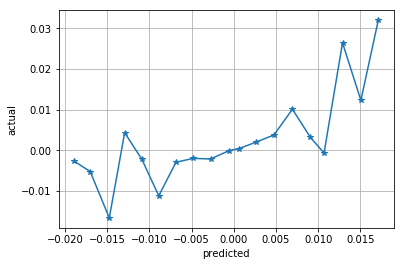

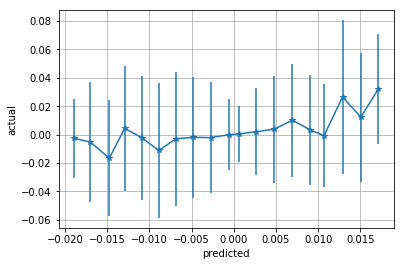

In [14]:
actual = totalActual
predicted = totalPredicted

actualMeanReturn = []
predictedMeanReturn = []
stdActualReturns = []
# Buckets are created
buckets = np.arange(-0.02,0.02,0.002)

actual = np.array(actual)
predicted = np.array(predicted)

# Predicted values and the actual values are placed into buckets
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for i in range(len(buckets)-1):
        index = np.logical_and(predicted>buckets[i], predicted<buckets[i+1])
        thisBucket = actual[index].mean()
        actualMeanReturn.append(thisBucket)
        predictedMeanReturn.append(predicted[index].mean())
        stdActualReturns.append(actual[index].std())

# Actual versus predicted values are plotted
plt.figure()
plt.plot(predictedMeanReturn,actualMeanReturn, marker='*')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.grid(True)
plt.show()

plt.figure()
plt.errorbar(predictedMeanReturn, actualMeanReturn, yerr = stdActualReturns, marker='*')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.grid(True)
plt.show()


**How much variance is there?**

Plot 2 answers this question by adding error bars to the previous plot. Length of the error bar is equal to the standard deviation of actual returns within each respective bucket.
Plots such as these would be typically used by a portfolio manager to assess behavior of prospective signals and to assess signal levels at which an action should be taken. The simplest trading system utilizing this signal would buy security when predicted return is above some threshold (say, above 0.5%) and sell (or short-sell) the security when the signal is below negative threshold (e.g. below -0.5%). 


In [18]:
import numpy as np
print('Variance: {}'.format(np.mean(stdActualReturns)))

Variance: 0.03897101804614067


## 5. Summary

In this lab, step by step implementation of a LSTM based deep neural network to predict time series financial data is presented. The performance of the model is evaluated with the pearson correlation and competitive performance is achieved. 

## 6. Post-Lab

Finally, don't forget to save your work from this lab before time runs out and the instance shuts down!!

1. You can download the data from this [link](https://www.kaggle.com/c/two-sigma-financial-modeling).

2. To use the data, please set the "usePreparedData" variable to False before running the code on your environment.

3. Also, remove the code "model_saver.restore(sess, pre_trained_model)" to train the model for you data.

4. You can execute the following cell block to zip the files you've been working on, and download it from the link below.




In [25]:
!tar -cvf output.zip "Trading Strategy for Finance using LSTMs.ipynb" prepareData.py images/dnn.jpg images/data.jpg images/data_split.jpg images/rnn.jpg

Trading Strategy for Finance using LSTMs.ipynb
prepareData.py
images/dnn.jpg
images/data.jpg
images/data_split.jpg
images/rnn.jpg


[Download output.zip](output.zip)

<a href="https://www.nvidia.com/dli"> <img src="images/DLI Header.png" alt="Header" style="width: 400px;"/> </a>